# Explore here

In [1]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#leemos los datos
df = pd.read_csv('../data/raw/Crypto Data Since 2015.csv')

df

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL)
0,2015-01-01,1099.671415,102.760097,1199.071870,0.490443,19.915520,0.209481,0.045930,5.987009
1,2015-01-02,1135.844985,110.806193,1201.928708,0.526877,20.271863,0.222041,0.054818,5.687508
2,2015-01-03,1250.613839,116.286699,1201.829678,0.520009,19.974075,0.229863,0.049255,7.050012
3,2015-01-04,1452.916825,118.393314,1199.858272,0.563435,19.942816,0.243224,0.047298,7.903578
4,2015-01-05,1479.501487,128.322865,1200.014190,0.644235,20.201745,0.238137,0.044584,8.140522
...,...,...,...,...,...,...,...,...,...
3853,2025-07-20,201438.363511,37272.840934,3116.776780,81.404630,1217.227532,37.627797,7.958920,1865.252122
3854,2025-07-21,201451.812917,37280.367574,3119.264261,81.416877,1217.462496,37.646788,7.964835,1865.690363
3855,2025-07-22,201486.682995,37293.699880,3119.258087,81.496301,1218.207155,37.625843,7.966728,1866.233507
3856,2025-07-23,201397.104075,37316.691378,3118.918393,81.483584,1218.922214,37.636958,7.969450,1864.891748


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3858 non-null   object 
 1   Bitcoin (USD)       3858 non-null   float64
 2   Ethereum (USD)      3858 non-null   float64
 3   Gold (USD per oz)   3858 non-null   float64
 4   Cardano (ADA)       3858 non-null   float64
 5   Binance Coin (BNB)  3858 non-null   float64
 6   Ripple (XRP)        3858 non-null   float64
 7   Dogecoin (DOGE)     3858 non-null   float64
 8   Solana (SOL)        3858 non-null   float64
dtypes: float64(8), object(1)
memory usage: 271.4+ KB


In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3858 non-null   object 
 1   Bitcoin (USD)       3858 non-null   float64
 2   Ethereum (USD)      3858 non-null   float64
 3   Gold (USD per oz)   3858 non-null   float64
 4   Cardano (ADA)       3858 non-null   float64
 5   Binance Coin (BNB)  3858 non-null   float64
 6   Ripple (XRP)        3858 non-null   float64
 7   Dogecoin (DOGE)     3858 non-null   float64
 8   Solana (SOL)        3858 non-null   float64
dtypes: float64(8), object(1)
memory usage: 271.4+ KB


In [5]:
#columnas que no son necesarias check
#transformar columnas categoricas
df['Date'] = pd.to_datetime(df['Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3858 entries, 0 to 3857
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                3858 non-null   datetime64[ns]
 1   Bitcoin (USD)       3858 non-null   float64       
 2   Ethereum (USD)      3858 non-null   float64       
 3   Gold (USD per oz)   3858 non-null   float64       
 4   Cardano (ADA)       3858 non-null   float64       
 5   Binance Coin (BNB)  3858 non-null   float64       
 6   Ripple (XRP)        3858 non-null   float64       
 7   Dogecoin (DOGE)     3858 non-null   float64       
 8   Solana (SOL)        3858 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 271.4 KB


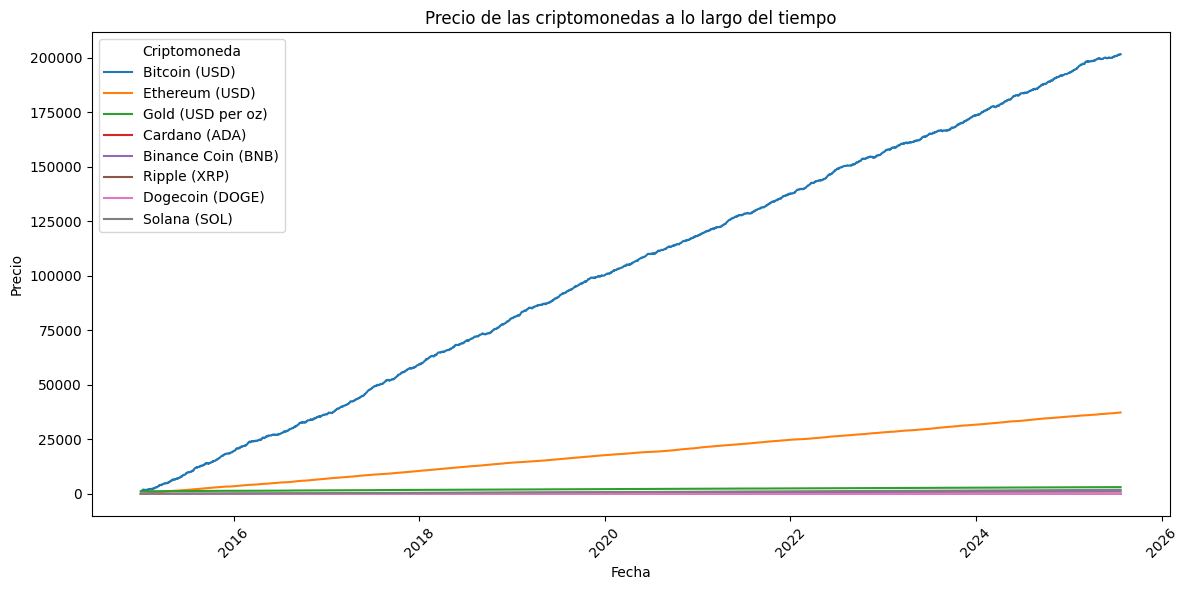

In [6]:
# gráficos de columnas numericas en el tiempo
plt.figure(figsize=(12, 6))
for column in df.columns:
    if column not in ['Date']:
        sns.lineplot(data=df, x='Date', y=column, label=column)
plt.title('Precio de las criptomonedas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(title='Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
#encontrar el maximo de Date
max_date = df['Date'].max()
print(f"La fecha máxima en el dataset es: {max_date}")

La fecha máxima en el dataset es: 2025-07-24 00:00:00


In [8]:
#separar nuestro conjunto de datos en train y test
#test será los ultimos 6 meses de datos
from datetime import timedelta
test_start_date = max_date - timedelta(days=180)
train_df = df[df['Date'] < test_start_date]
test_df = df[df['Date'] >= test_start_date]
print(f"Train set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Train set size: (3677, 9)
Test set size: (181, 9)


In [10]:
# Escalar las columnas de precios
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
price_columns = df.columns.difference(['Date'])
train_df[price_columns] = scaler.fit_transform(train_df[price_columns])
test_df[price_columns] = scaler.transform(test_df[price_columns])

/tmp/ipykernel_4917/1652947895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[price_columns] = scaler.fit_transform(train_df[price_columns])
/tmp/ipykernel_4917/1652947895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[price_columns] = scaler.transform(test_df[price_columns])


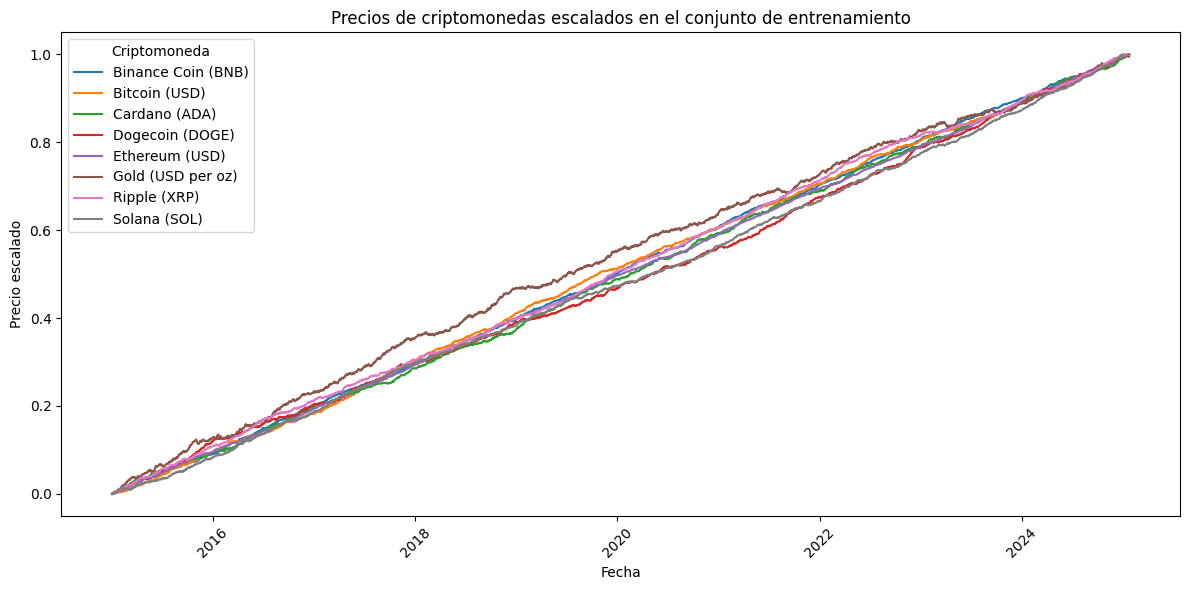

In [11]:
# graficar datos escalados
plt.figure(figsize=(12, 6))
for column in price_columns:
    sns.lineplot(data=train_df, x='Date', y=column, label=column)
plt.title('Precios de criptomonedas escalados en el conjunto de entrenamiento')
plt.xlabel('Fecha')
plt.ylabel('Precio escalado')
plt.legend(title='Criptomoneda')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

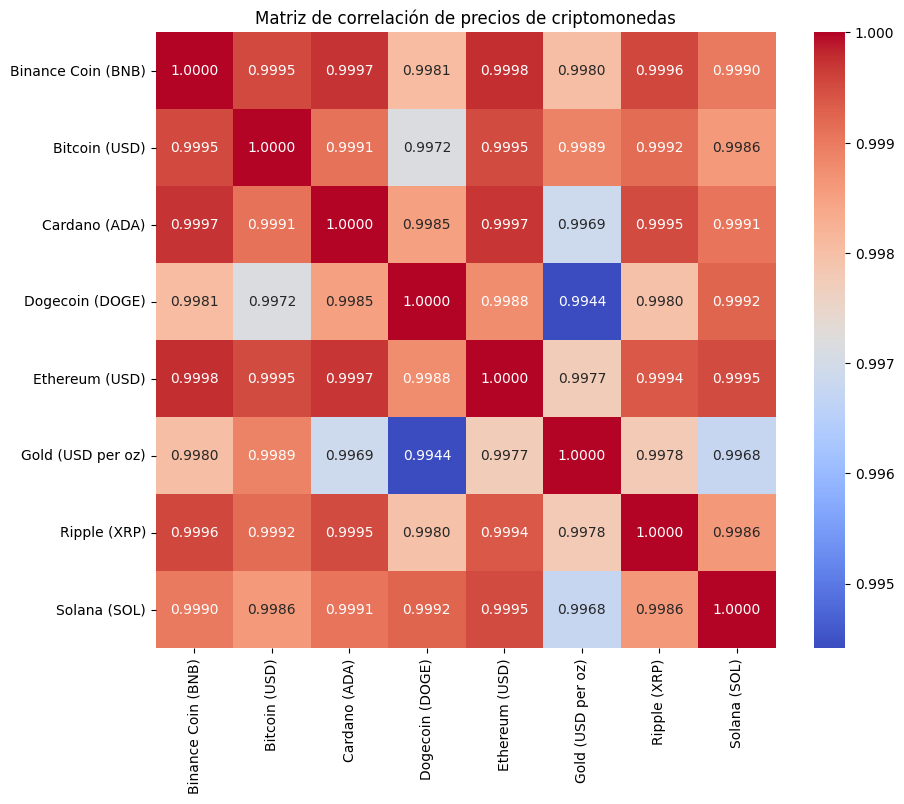

In [12]:
# Gráfico de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[price_columns].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".4f", cmap='coolwarm')
plt.title('Matriz de correlación de precios de criptomonedas')
plt.show()

In [13]:
#nuestra variable a predecir será el precio del Ethereum (ETH), y vamos a usar otros precios desfasados 5 días como características
def create_features(df, target_column, lag=15):
    for i in range(1, lag + 1):
        df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
    return df
train_df = create_features(train_df, 'Ethereum (USD)', lag=15)
test_df = create_features(test_df, 'Ethereum (USD)', lag=15)
# Eliminar filas con valores NaN
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
# Verificar las primeras filas del conjunto de entrenamiento
train_df.head()

/tmp/ipykernel_4917/770993028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
/tmp/ipykernel_4917/770993028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{target_column}_lag_{i}'] = df[target_column].shift(i)
/tmp/ipykernel_4917/770993028.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,Date,Bitcoin (USD),Ethereum (USD),Gold (USD per oz),Cardano (ADA),Binance Coin (BNB),Ripple (XRP),Dogecoin (DOGE),Solana (SOL),Ethereum (USD)_lag_1,...,Ethereum (USD)_lag_6,Ethereum (USD)_lag_7,Ethereum (USD)_lag_8,Ethereum (USD)_lag_9,Ethereum (USD)_lag_10,Ethereum (USD)_lag_11,Ethereum (USD)_lag_12,Ethereum (USD)_lag_13,Ethereum (USD)_lag_14,Ethereum (USD)_lag_15
15,2015-01-16,0.003412,0.003247,0.004851,0.003786,0.004423,0.005220,0.005317,0.003985,0.003381,...,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440,0.000380,0.000226,0.000000
16,2015-01-17,0.003146,0.003320,0.004683,0.004402,0.005095,0.005632,0.006297,0.004882,0.003247,...,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440,0.000380,0.000226
17,2015-01-18,0.003567,0.003937,0.004957,0.003915,0.005838,0.006492,0.007086,0.005669,0.003320,...,0.003192,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440,0.000380
18,2015-01-19,0.003356,0.004485,0.005356,0.005660,0.006905,0.007566,0.007693,0.005703,0.003937,...,0.003083,0.003192,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719,0.000440
19,2015-01-20,0.002885,0.004835,0.003812,0.006743,0.007353,0.007147,0.007135,0.005912,0.004485,...,0.003408,0.003083,0.003192,0.002631,0.002310,0.001564,0.001193,0.001116,0.000940,0.000719


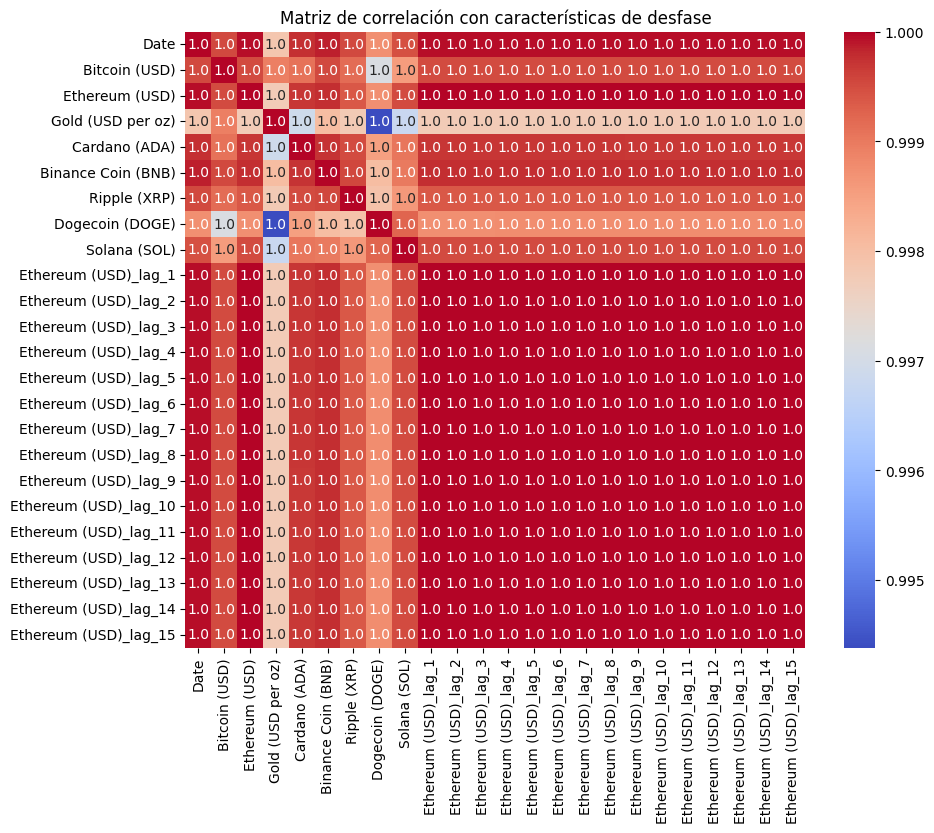

In [14]:
#volver a graficar las correlaciones
plt.figure(figsize=(10, 8))
correlation_matrix = train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Matriz de correlación con características de desfase')
plt.show()

In [15]:
# vamos a usar el lag 15 de etherum  para predecir el precio actual de binance

#seleccionamos como características el lag 15 de ethereum
X_train = train_df[['Ethereum (USD)_lag_15']]
y_train = train_df['Binance Coin (BNB)']
X_test = test_df[['Ethereum (USD)_lag_15']]
y_test = test_df['Binance Coin (BNB)']

In [16]:
# Entrenamos varios modelos de regresión para saber cual es el mejor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Machine': SVR(),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}

# Mostrar resultados
results_df = pd.DataFrame(results).T
results_df.sort_values(by='R2', ascending=False)
results_df

,MSE,R2
Linear Regression,0.000200,0.123418
Random Forest,0.000853,-2.731742
Support Vector Machine,0.016711,-72.107919
XGBoost,0.000990,-3.332753


In [17]:
# Entrenamos el mejor modelo (Linear Regression)
best_model = LinearRegression()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mejor modelo: Linear Regression - MSE: {mse}, R2: {r2}")

Mejor modelo: Linear Regression - MSE: 0.00020036733323514465, R2: 0.12341822246257861


In [18]:
scaler = MinMaxScaler()
#escalar solo el precio de etherum
scaler.fit(train_df[['Ethereum (USD)_lag_15']])

scaler_binance = MinMaxScaler()
#escalar solo el precio de binance
scaler_binance.fit(train_df[['Binance Coin (BNB)']])

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [19]:
# guardar el modelo entrenado
from pickle import dump
dump(best_model, open('../models/best_model.pkl', 'wb'))
#guardar el scaler
dump(scaler, open('../models/scaler.pkl', 'wb'))
# guardar el scaler de binance
dump(scaler_binance, open('../models/scaler_binance.pkl', 'wb'))


En este análisis se exploraron los precios históricos de diversas criptomonedas y se desarrolló un modelo de regresión lineal para predecir el precio de Binance Coin (BNB) utilizando el precio de Ethereum (ETH) desfasado 15 días como característica principal. El modelo de regresión lineal obtuvo el mejor desempeño comparado con otros algoritmos, aunque el valor de R² indica que la capacidad predictiva es limitada. Esto sugiere que, si bien existe cierta relación entre los precios de estas criptomonedas, factores adicionales y características más complejas podrían mejorar la precisión de las predicciones. El flujo de trabajo implementado permite escalar y preparar los datos, entrenar modelos y guardar los resultados para futuras aplicaciones.